The following program gather earthquake data from https://earthquake.usgs.gov 
<br>that happened over the last 2 weeks

# Data Collection

Data collection is using API from the website as follow:
<br>https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=YYYY-MM-DD&endtime=YYYY-MM-DD
<br><br><b>[1] construct the start/end date in YYYY-MM-DD format

In [1]:
import datetime
# get the current date 
day = int(datetime.datetime.now().strftime("%d"))
month = int(datetime.datetime.now().strftime("%m"))
year = int(datetime.datetime.now().strftime("%Y"))
hour = int(datetime.datetime.now().strftime("%H"))
minute = int(datetime.datetime.now().strftime("%M"))
second = int(datetime.datetime.now().strftime("%S"))

DAYS_BEFORE = 14

currDate = datetime.datetime(year, month, day, hour, minute, second)
print 'currDate:',currDate

# End timestamp should be today's midnight
endDate = currDate + datetime.timedelta(days=1)
print 'endDate:',endDate.strftime("%Y-%m-%d")

# Start timestamp is last 14 days
startDate = currDate - datetime.timedelta(days=DAYS_BEFORE)
print 'startDate:',startDate.strftime("%Y-%m-%d")

currDate: 2018-09-29 00:33:49
endDate: 2018-09-30
startDate: 2018-09-15


<b>[2] Construct the URL

In [2]:
urlStart = startDate.strftime("%Y-%m-%d")
urlEnd = endDate.strftime("%Y-%m-%d")

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime='+urlStart+'&endtime='+urlEnd
print url

https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2018-09-15&endtime=2018-09-30


<b>[3] Download the data

In [3]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

resp = requests.get(url=url)
data = resp.json()

# process the JSON response
# put it into dataframe
response_df = json_normalize(data['features'])

response_df.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.status,properties.time,properties.title,properties.tsunami,properties.type,properties.types,properties.tz,properties.updated,properties.url,type
0,"[-147.2956, 68.6269, 0]",Point,ak20266354,None,NaN,20266354,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,automatic,1538151744415,"M 1.9 - 91km NW of Arctic Village, Alaska",0,earthquake,",geoserve,origin,",-540.0,1538151973186,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
1,"[-116.9068298, 33.4918327, 6.84]",Point,ci37372930,None,NaN,37372930,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.14270,NaN,53.0,...,automatic,1538151591000,"M 0.7 - 7km NW of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1538151809726,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
2,"[-155.4588318, 19.2056675, 35.93]",Point,hv70618267,None,NaN,70618267,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.05009,NaN,113.0,...,automatic,1538151312020,"M 2.0 - 2km E of Pahala, Hawaii",0,earthquake,",geoserve,origin,phase-data,",-600.0,1538151515900,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
3,"[-116.7886667, 33.4878333, 3.7]",Point,ci37372914,None,NaN,37372914,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02635,NaN,70.0,...,automatic,1538151157750,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1538151380686,https://earthquake.usgs.gov/earthquakes/eventp...,Feature
4,"[-162.6996, 67.6679, 7.8]",Point,ak20266349,None,NaN,20266349,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,automatic,1538150542291,"M 2.3 - 15km NE of Noatak, Alaska",0,earthquake,",geoserve,origin,",-540.0,1538150871514,https://earthquake.usgs.gov/earthquakes/eventp...,Feature


# Inspect Data

<b>[1] Check on the available columns</b>
<br> further info is available from https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson_detail.php

In [4]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 30 columns):
geometry.coordinates    4472 non-null object
geometry.type           4472 non-null object
id                      4472 non-null object
properties.alert        29 non-null object
properties.cdi          186 non-null float64
properties.code         4472 non-null object
properties.detail       4472 non-null object
properties.dmin         3098 non-null float64
properties.felt         186 non-null float64
properties.gap          3109 non-null float64
properties.ids          4472 non-null object
properties.mag          4471 non-null float64
properties.magType      4471 non-null object
properties.mmi          47 non-null float64
properties.net          4472 non-null object
properties.nst          2761 non-null float64
properties.place        4472 non-null object
properties.rms          4472 non-null float64
properties.sig          4472 non-null int64
properties.sources      4472 non-null

For earthquake we probably interested to know:
<br>1. When it happened (date/time) --> properties.time
<br>2. What was the magnitude --> properties.mag
<br>3. Where it happened --> properties.place
<br>4. Coordinate so that it can be plotted --> geometry.coordinates

<b>check on the date/time<b>

In [5]:
print 'Sample\t:',response_df['properties.time'][0]
print 'type\t:',type(response_df['properties.time'])
print response_df['properties.time'][0]

Sample	: 1538151744415
type	: <class 'pandas.core.series.Series'>
1538151744415


In [6]:
# Times are reported in milliseconds since the epoch, and provided in UTC
# good to convert this into human readable format

def convertEpochToReadable(dt):
    time1 = float(dt/1000)
    return datetime.datetime.fromtimestamp(time1).strftime('%d-%m-%Y %H:%M:%S')

print 'Converted\t:',convertEpochToReadable(response_df['properties.time'][0])

Converted	: 29-09-2018 00:22:24


<b>check on the coordinate</b>

In [7]:
print 'Sample\t:',response_df['geometry.coordinates'][0]
print 'type\t:',type(response_df['geometry.coordinates'])

Sample	: [-147.2956, 68.6269, 0]
type	: <class 'pandas.core.series.Series'>


In [8]:
# coordinate return as series -> [lon,lat,depth]
print 'lon:',response_df['geometry.coordinates'][0][0]
print 'lat:',response_df['geometry.coordinates'][0][1]
print 'depth',response_df['geometry.coordinates'][0][2]

lon: -147.2956
lat: 68.6269
depth 0


<b>Check on mangitude</b>

In [9]:
print 'Sample\t:',response_df['properties.mag'][0]
print 'type\t:',type(response_df['properties.mag'])

Sample	: 1.9
type	: <class 'pandas.core.series.Series'>


<b>Check on location</b>

In [10]:
print 'Sample\t:',response_df['properties.place'][0]
print 'type\t:',type(response_df['properties.place'])

Sample	: 91km NW of Arctic Village, Alaska
type	: <class 'pandas.core.series.Series'>


# Prepare data for further analysis

let's create new data frame
<br>split the coordinate to 3 columns --> longitude, latitude, depth
<br>new columns for human readable timestamp --> delete existing column

<b>Create new dataframe from the original</b>

In [11]:
earthquake_df = response_df[['geometry.coordinates','properties.mag','properties.place','properties.time']].copy()
earthquake_df.head()

,geometry.coordinates,properties.mag,properties.place,properties.time
0,"[-147.2956, 68.6269, 0]",1.90,"91km NW of Arctic Village, Alaska",1538151744415
1,"[-116.9068298, 33.4918327, 6.84]",0.72,"7km NW of Aguanga, CA",1538151591000
2,"[-155.4588318, 19.2056675, 35.93]",1.98,"2km E of Pahala, Hawaii",1538151312020
3,"[-116.7886667, 33.4878333, 3.7]",0.42,"9km NE of Aguanga, CA",1538151157750
4,"[-162.6996, 67.6679, 7.8]",2.30,"15km NE of Noatak, Alaska",1538150542291


<b>split the coordinate to 3 columns</b>

In [12]:
# custom function to split coordinate
def splitCoordinate(coor):
    lon,lat,depth = coor
    
    return pd.Series([lon,lat,depth])

In [13]:
earthquake_df[['lon','lat','depth']] = earthquake_df['geometry.coordinates'].apply(splitCoordinate)
earthquake_df.head()

,geometry.coordinates,properties.mag,properties.place,properties.time,lon,lat,depth
0,"[-147.2956, 68.6269, 0]",1.90,"91km NW of Arctic Village, Alaska",1538151744415,-147.295600,68.626900,0.00
1,"[-116.9068298, 33.4918327, 6.84]",0.72,"7km NW of Aguanga, CA",1538151591000,-116.906830,33.491833,6.84
2,"[-155.4588318, 19.2056675, 35.93]",1.98,"2km E of Pahala, Hawaii",1538151312020,-155.458832,19.205668,35.93
3,"[-116.7886667, 33.4878333, 3.7]",0.42,"9km NE of Aguanga, CA",1538151157750,-116.788667,33.487833,3.70
4,"[-162.6996, 67.6679, 7.8]",2.30,"15km NE of Noatak, Alaska",1538150542291,-162.699600,67.667900,7.80


<b>convert time into human readable format</b>

In [14]:
earthquake_df['datetime'] = earthquake_df['properties.time'].apply(convertEpochToReadable)
earthquake_df.head()

,geometry.coordinates,properties.mag,properties.place,properties.time,lon,lat,depth,datetime
0,"[-147.2956, 68.6269, 0]",1.90,"91km NW of Arctic Village, Alaska",1538151744415,-147.295600,68.626900,0.00,29-09-2018 00:22:24
1,"[-116.9068298, 33.4918327, 6.84]",0.72,"7km NW of Aguanga, CA",1538151591000,-116.906830,33.491833,6.84,29-09-2018 00:19:51
2,"[-155.4588318, 19.2056675, 35.93]",1.98,"2km E of Pahala, Hawaii",1538151312020,-155.458832,19.205668,35.93,29-09-2018 00:15:12
3,"[-116.7886667, 33.4878333, 3.7]",0.42,"9km NE of Aguanga, CA",1538151157750,-116.788667,33.487833,3.70,29-09-2018 00:12:37
4,"[-162.6996, 67.6679, 7.8]",2.30,"15km NE of Noatak, Alaska",1538150542291,-162.699600,67.667900,7.80,29-09-2018 00:02:22


<b>drop the column time and coordinate</b>
<br><b>rename the columns accordingly</b>

In [15]:
earthquake_df.drop(['geometry.coordinates','properties.time'], axis=1, inplace=True)

earthquake_df.rename(columns={'properties.mag': 'magnitude',\
                           'properties.place': 'place',\
                           'properties.tsunami': 'tsunami'},\
                  inplace=True)

earthquake_df.head()

,magnitude,place,lon,lat,depth,datetime
0,1.90,"91km NW of Arctic Village, Alaska",-147.295600,68.626900,0.00,29-09-2018 00:22:24
1,0.72,"7km NW of Aguanga, CA",-116.906830,33.491833,6.84,29-09-2018 00:19:51
2,1.98,"2km E of Pahala, Hawaii",-155.458832,19.205668,35.93,29-09-2018 00:15:12
3,0.42,"9km NE of Aguanga, CA",-116.788667,33.487833,3.70,29-09-2018 00:12:37
4,2.30,"15km NE of Noatak, Alaska",-162.699600,67.667900,7.80,29-09-2018 00:02:22


# Basic data analysis

In [16]:
# Let's look at the summary of the data
# this give the stats for the numerical value
earthquake_df.describe()

,magnitude,lon,lat,depth
count,4471.000000,4472.000000,4472.000000,4472.000000
mean,1.449629,-118.075666,42.704187,18.605961
std,1.213993,57.818513,19.546213,49.697182
min,-1.260000,-179.949400,-60.610600,-3.490000
25%,0.630000,-147.631800,33.508667,2.155000
50%,1.290000,-120.609000,38.756167,5.805000
75%,1.900000,-116.788167,60.328325,13.205000
max,7.500000,179.941900,69.847700,652.720000


[1] We have 100367 data from the dataframe, basically that's number of earthquake happened in the last two week.
<br>[2] Greatest earthquake was of magnitude 6.9
<br>[3] describe() does not cover timestamp and place as both are non-numeric

In [17]:
# describe doesn't cover the timestamp
# now let's check the date range
latestEQ = earthquake_df['datetime'].max()
earliestEQ = earthquake_df['datetime'].min()

print 'Earthquake date from "'+earliestEQ+'" to "'+latestEQ+'" UTC'

Earthquake date from "15-09-2018 08:01:11" to "29-09-2018 00:22:24" UTC


In [18]:
# check on the latest earthquake
earthquake_df[earthquake_df['datetime'] == earthquake_df['datetime'].max()]

,magnitude,place,lon,lat,depth,datetime
0,1.9,"91km NW of Arctic Village, Alaska",-147.2956,68.6269,0.0,29-09-2018 00:22:24


In [19]:
# check on the greatest earthquake
earthquake_df[earthquake_df['magnitude'] == earthquake_df['magnitude'].max()]

,magnitude,place,lon,lat,depth,datetime
76,7.5,"78km N of Palu, Indonesia",119.8401,-0.1781,10.0,28-09-2018 18:02:43


Text(0.5,1,u'Earthquake between 2018-09-15 till 29-09-2018 00:22:24')

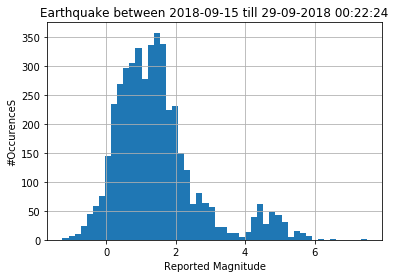

In [20]:
# Check on the number of earthquake during the period
import matplotlib.pyplot as plt
%matplotlib inline

earthquake_df['magnitude'].hist(bins=50)
plt.xlabel("Reported Magnitude")
plt.ylabel("#OccurenceS")
plt.title("Earthquake between "+urlStart+" till "+latestEQ)

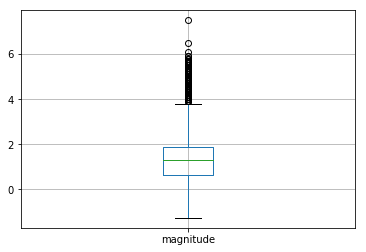

In [21]:
earthquake_df.boxplot(column='magnitude')

Majority of the earthquakes were below 4.0 magnitude
<br>and 2 on average

In [22]:
# add mangnitude class label
# ref: http://www.geo.mtu.edu/UPSeis/magnitude.html

def addClass(mag):
    if (mag>8):
        return 'Great'
    elif (mag>7):
        return 'Major'
    elif (mag>6):
        return 'Strong'
    elif (mag>5):
        return 'Moderate'
    elif (mag>4):
        return 'Light'
    elif (mag>3):
        return 'Minor'
    else:
        return 'Not felt'

earthquake_df['Class'] = earthquake_df['magnitude'].apply(addClass)
earthquake_df.head()

,magnitude,place,lon,lat,depth,datetime,Class
0,1.90,"91km NW of Arctic Village, Alaska",-147.295600,68.626900,0.00,29-09-2018 00:22:24,Not felt
1,0.72,"7km NW of Aguanga, CA",-116.906830,33.491833,6.84,29-09-2018 00:19:51,Not felt
2,1.98,"2km E of Pahala, Hawaii",-155.458832,19.205668,35.93,29-09-2018 00:15:12,Not felt
3,0.42,"9km NE of Aguanga, CA",-116.788667,33.487833,3.70,29-09-2018 00:12:37,Not felt
4,2.30,"15km NE of Noatak, Alaska",-162.699600,67.667900,7.80,29-09-2018 00:02:22,Not felt


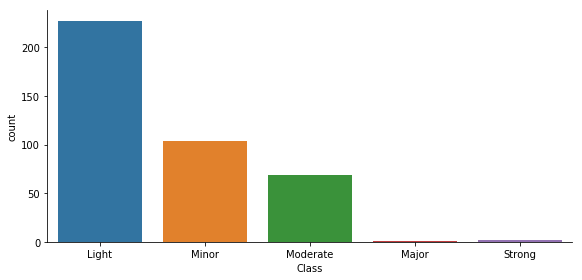

In [23]:
import seaborn as sns
sns.factorplot('Class',data=earthquake_df[earthquake_df['magnitude']>3],
               kind='count',aspect=2)

Majority are categorize as Not-felt
<br>and we have occurance of Strong
<br>let's check on it

In [24]:
earthquake_df.groupby('Class').size().reset_index(name='counts')

,Class,counts
0,Light,227
1,Major,1
2,Minor,104
3,Moderate,69
4,Not felt,4069
5,Strong,2


In [25]:
# Strong > 6
earthquake_df[earthquake_df['magnitude'] > 6]

,magnitude,place,lon,lat,depth,datetime,Class
76,7.5,"78km N of Palu, Indonesia",119.8401,-0.1781,10.00,28-09-2018 18:02:43,Major
118,6.1,"55km NNW of Palu, Indonesia",119.7631,-0.3976,18.08,28-09-2018 15:00:01,Strong
3951,6.5,South of the Fiji Islands,178.2198,-25.4526,569.97,17-09-2018 05:11:48,Strong


In [27]:
from datetime import datetime

a = datetime.strptime(earthquake_df.iloc[804].datetime, "%d-%m-%Y %H:%M:%S")
b = datetime.now()

delta = b - a

print 'greatest earthquake at %s' %a
print 'current timestamp = %s' %b
print '%s days ago' %delta.days

greatest earthquake at 2018-09-26 12:33:26
current timestamp = 2018-09-29 00:34:02.585000
2 days ago


In [29]:
# check distance

import math

def distance_between_coordinate(ln1,ln2,lt1,lt2):
    ln_dist = ln2 - ln1
    lt_dist = lt2 - lt1
    
    ln_dist_sq = ln_dist ** 2
    lt_dist_sq = lt_dist ** 2
    
    hp_dis = math.sqrt(ln_dist_sq + lt_dist_sq)
    
    return hp_dis

# Visualize data on the map

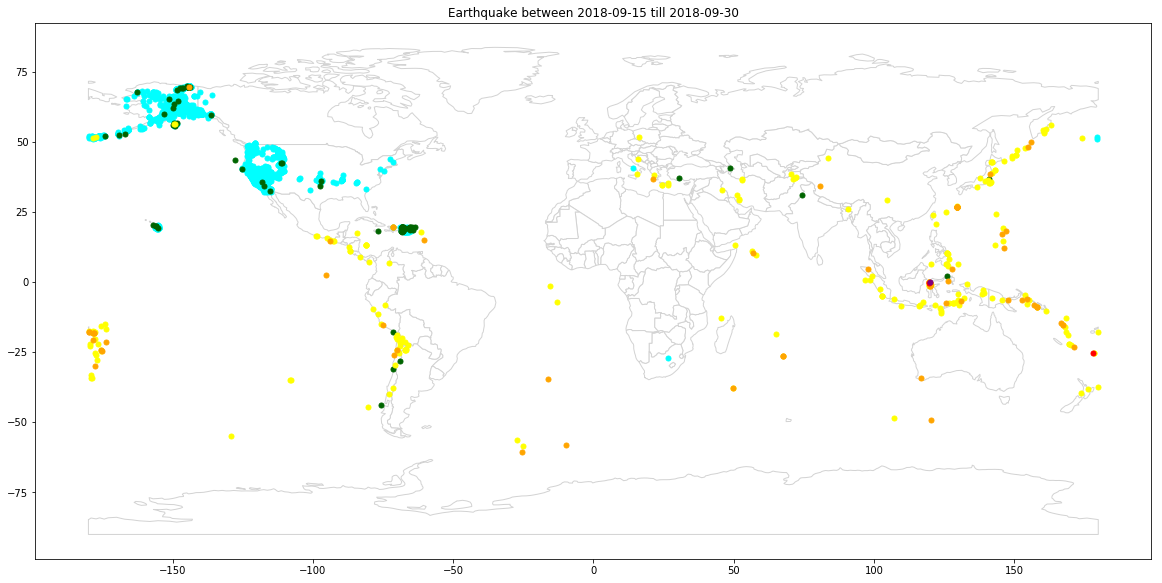

In [31]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

crs = {'init': 'epsg:4326'}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#world = world[world.name=="Malaysia"]
from matplotlib import cm

base = world.plot(figsize=(20,20),color='white', edgecolor='lightgrey')
base.set_title("Earthquake between "+urlStart+" till "+urlEnd)

colorDict = {'Great': 'darkred', # >8
             'Major': 'purple', # >7
             'Strong': 'red', # >6
             'Moderate': 'orange', # >5
             'Light': 'yellow', # >4
             'Minor': 'darkgreen', # >3
             'Not felt': 'cyan' # <3
            }

#classType = ['Great','Major','Strong','Moderate','Light','Minor','Not felt']
classType = ['Not felt','Minor','Light','Moderate','Strong','Major','Great']
for cType in classType:
    if(len(earthquake_df[earthquake_df['Class']==cType])>0):
        subsetDF = earthquake_df[earthquake_df['Class']==cType]
        geometry = [Point(xy) for xy in zip(subsetDF.lon, subsetDF .lat)]
        subsetGDF = GeoDataFrame(subsetDF, crs=crs, geometry=geometry)
    
        subsetGDF.plot(ax=base, marker='.', color=colorDict[cType], markersize=100);